### Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

### MNIST dataset 

Finding dataset is foremost part to build any Machine Learning Algorithm. As a Machine Learning engineer, you may at times need to create your own dataset and label each example which could get highly expensive both in terms of time and money. For example, you can start taking pictures with your camera and save each image by putting a label  against it e.g. cat. Theoretically, you can create a giant dataset with picture of every object. [Imagenet](https://en.wikipedia.org/wiki/ImageNet) is such a dataset with 14 million images. Here, you'll not create any dataset instead you'll find a dataset already on web. Specifically, you'll find [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Which is a dataset of hand written digits. See a few examples below.
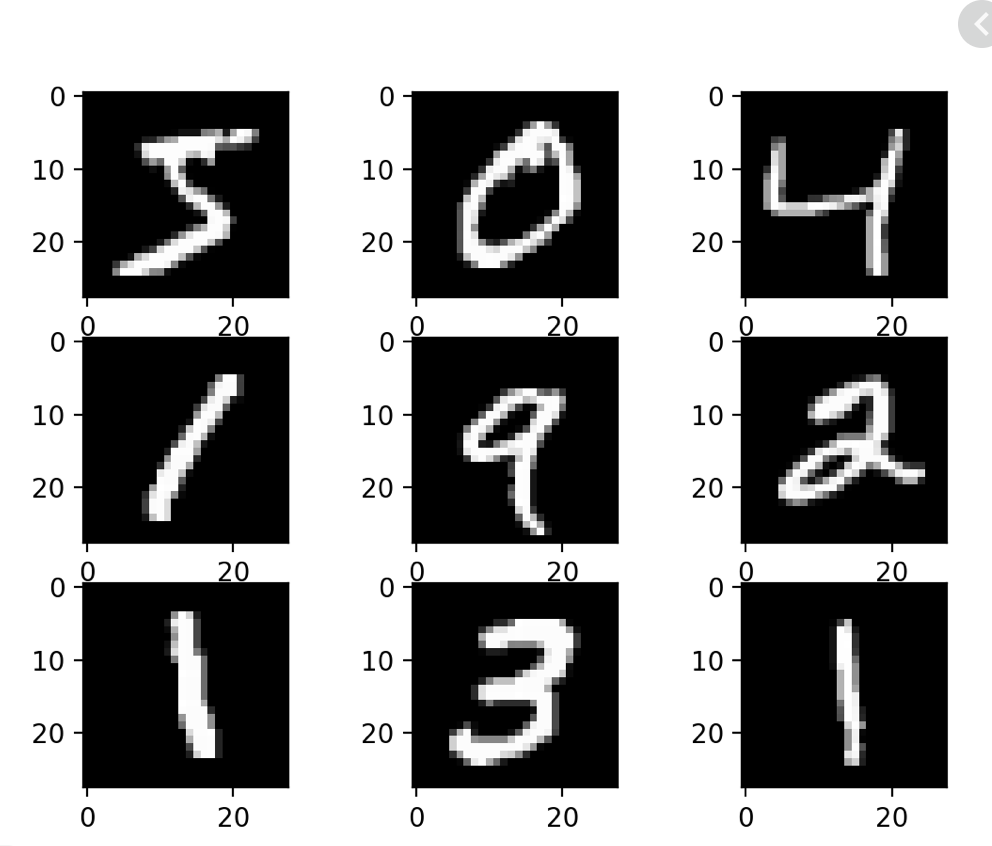

### Download MNIST dataset 


In [6]:
from sklearn import datasets
from sklearn.datasets import fetch_openml
import pandas as pd

def download_data():
    '''
    args: None
    return: dict with at least two keys. The first key is 'data' of shape (70000, 784) 
    (i.e. it contains 70,000 examples (images of digits) and each example contains 784 pixels. 
    The second key is 'target' of shape (70,000,) which contains labels for each example.
    
    Staff's solution is two lines of code. 
    
    This function may take a few seconds to execute.
    '''
    

    mnist = fetch_openml('mnist_784', version=1)
    

    return mnist 


In [7]:
mnist = download_data() # takes a few seconds.

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

### Convert labels of strings to labels of integers. 

In [16]:
def labels_to_int_dtype(mnist):
    '''
    args: dict (mnist containing above keys)
    returns: ndarray of shape (70000,) -> Labels (in mnist at key target) are strings e.g. '5', '3'. 
                        Return an ndarray with integer labels e.g. 5, 3
                        
    Staff's solution contains two lines of code. You should use map(lambda) for this which is good practice but
        not required. Or you can use list comprehension. 
    '''
    label = mnist.target.astype(np.int)
    return label

In [17]:
assert labels_to_int_dtype(mnist).shape == (70000,)


In [18]:
labels = labels_to_int_dtype(mnist)
labels.shape # (70,000)

(70000,)

### Transition to a Smaller Dataset 
The cells above tested on 'finding real-world data' and some preprocessing. It turns out MNIST dataset above is a large dataset and somme of the algorithms we'll implement in this test might take more than a few minutes on that dataset which we don't want considering that it's a test. To this end, we'll load another smaller digits dataset and work with that to expediate training and testing. In MNIST each image has 784 features/dims/pixels whereas in the smaller dataset there are only 64 and images might appear blurry.

In [20]:
digits_dict = load_digits()
_data = digits_dict.data
labels = digits_dict.target

### Split dataset into Train Split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(_data, labels, \
                                                                test_size=.2, random_state=42)

In [22]:
# A sanity check
assert x_train.shape[0] == y_train.shape[0] and x_test.shape[0] == y_test.shape[0]

### Visualize Digits
Each example in our train/test data contains an image of a digit (currently, as ndarray). Let's visualize a few examples. we will plot/show_image [subplots](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplot.html) of n digits to the current figure instead of plotting each digit in a separate figure. Note that each image/digit is ndarray of shape (784,); we'll reshape it to fit your needs.

In [23]:
from matplotlib.pyplot import subplot

def plot_digits(x, y, _fig_size=(20,4)):
    '''
    args: x -> ndarray of shape (m,n) -> (m examples/digits each of shape n). Think of x 
                                        as truncated x_train or truncated x_test
          y -> ndarray of shape (m,) -> (corresponding labels of x)
          
          _fig_size: tupe (a,b) -> (Width, height in inches of the figure to be created)

    return: None (just observe the digits images yourself)
    '''
    
  

    plt.figure(figsize=(20,4))
    for i in range(x.shape[0]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(np.reshape(x[i], (8,8)), cmap=plt.cm.gray)
        plt.title('Label: {}'.format(y[i]), fontsize = 15)
    
    

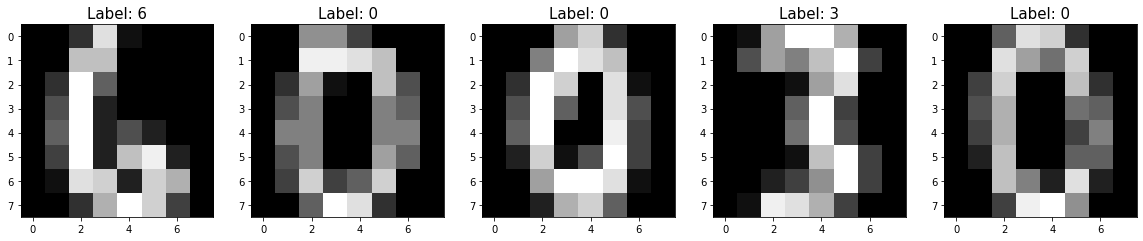

In [24]:
plot_digits(x_train[:5], y_train[:5])

### Scaling Features

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

### Train a logistic Regression on x_train

In [26]:
def fit_log_reg_model(x_train, y_train):
    '''
    args: x_train-> ndarray (m, n)
          y_train-> ndarray (m, )
    
    return: a fitted sklearn.linear_model._logistic.LogisticRegression object which can predict. 
    '''
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    return logreg


    


In [27]:
logst_reg = fit_log_reg_model(scaled_x_train, y_train)

C:\Users\kaled\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kaled\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Score
Find coefficient of determination a.k.a. score.

In [28]:
score = logst_reg.score(scaled_x_test, y_test)
score

0.9666666666666667

In [29]:
logst_reg.predict(x_test[30].reshape(1,-1))

array([1])

In [30]:
score = logst_reg.score(scaled_x_test, y_test)
assert score > .96

### Predictions

In [31]:
predictions = logst_reg.predict(scaled_x_test)

### Misclassified Labels:
Store the indexes of images (digits) in test data which were misclassfied (whose correct label was not predicted)

In [32]:

def misclassified_idx(y_test, predictions):
    '''
    args: y_test: actual labels -> ndarray
          predictions: predicted labels  -> ndarray
          
    return: ndarray (Note that you'll work with Python list. We provide code to convert your list to ndarray)
    '''
    misclassifiedIndexes = [] # empty list
    j=0
    for i in range(len(y_test)):
        if(y_test[i] != predictions[i]):
            misclassifiedIndexes.append(y_test[i])
            
            
    
    return np.asarray(misclassifiedIndexes)

In [33]:
misclassified_idx(y_test, predictions)


array([7, 3, 9, 9, 4, 5, 8, 8, 6, 9, 5, 8])

### Train a k nearest neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:
def fit_kNN_model(x_train, y_train):
    '''
    args: x_train-> ndarray (m, n)
          y_train-> ndarray (m, )
    
    return: a fitted sklearn.neighbors._classification.KNeighborsClassifier object which can predict. 
    '''
    knn = KNeighborsClassifier(n_neighbors=3)
    return knn.fit(x_train,y_train)

    
    

In [39]:
kNN_model = fit_kNN_model(scaled_x_train, y_train)

In [40]:
kNN_model.score(scaled_x_test, y_test) 

0.9666666666666667